<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_2_SRAL_file_structure.ipynb"><< SRAL file structure</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_4_SRAL_tracks.ipynb">SRAL tracks >></a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2023 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT), Vinca Rosmorduc (CLS)

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fsensors%2Flearn-sral/HEAD?urlpath=%2Ftree%2F1_SRAL_introductory%2F1_3_SRAL_coverage.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://jupyterhub-wekeo.apps.eumetsat.dpi.wekeo.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/learn-sral/1_SRAL_introductory/1_3_SRAL_coverage.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg?style=flat&logo=" alt="Open in WEkEO"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>    
</html>

<div class="alert alert-block alert-success">
<h3>Learn SRAL: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook, and will retrieve the data required here.
  - **<a href="./1_1a_SRAL_data_access_Data_Store.ipynb" target="_blank">1_1a_SRAL_data_access_Data_Store.ipynb</a>** if using the Data Store for data access
    <br><br>**OR**<br><br>
  - **<a href="./1_1b_SRAL_data_access_HDA.ipynb" target="_blank">1_1b_SRAL_data_access_HDA.ipynb</a>** if using WEkEO for data access
    
</div>
<hr>

# 1.3 Determining SRAL product coverage

### Data used

| Product Description  | Data Store collection ID| Product Navigator | WEkEO HDA ID | WEkEO metadata |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:--------:|
| Sentinel-3 SRAL level-1B | EO:EUM:DAT:0406 |<a href="https://navigator.eumetsat.int/product/EO:EUM:DAT:SENTINEL-3:SR_1_SRA___NTC?query=SRAL&s=advanced" target="_blank">link</a> | EO:EUM:DAT:SENTINEL-3:SR_1_SRA___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3ASR_1_SRA___" target="_blank">link</a> |
| Sentinel-3 SRAL level-2 | EO:EUM:DAT:0415 | <a href="https://navigator.eumetsat.int/product/EO:EUM:DAT:SENTINEL-3:SR_2_WAT___NTC?query=SRAL&s=advanced" target="_blank">link</a> | EO:EUM:DAT:SENTINEL-3:SR_2_WAT___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3ASR_2_WAT___" target="_blank">link</a>|

### Learning outcomes

At the end of this notebook you will know;
* About the "Product Dissemination Units" that SRAL data products are distributed in.
* What the SRAL PDU's look like in terms of ground coverage.
* What this means for 'revisit' time or how often you can get data for a specific area.
* How to extract the polygon which represents data coverage from and SRAL data product manifest file.
* How to visualise this data on a map.

### Outline

Whilst the Sentinel-3 satellites continuously orbit the planet, data received must be split in to manageable portions for processing and distribution. Data from the SAR Radar Altimeter (SRAL) aboard the Sentinel-3 satellites, is distributed in specific "product dissemination units" (PDUs). You can find out detailed information about the different types of PDUs and which ones are used for which Sentinel-3 products in the  <a href='https://eumetsatspace.atlassian.net/wiki/spaces/DPF/pages/1615659023/Product+dissemination+units+PDUs' target='_blank'> EUMETSAT user support knowledge base </a> 

<div class="alert alert-info" role="alert">

## <a id='TOC-TOP'></a>Contents

</div>
    
 1. [Investigating SRAL coverage](#section1)
 2. [Investigating SRAL PDUs](#section2)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
import datetime                      # a library that supports using dates and times
import cartopy                       # a library that support mapping
import glob                          # a library that aids in searching for files
import matplotlib.pyplot as plt      # a library that support plotting
import numpy as np                   # a library that provides support for array-based mathematics
import os                            # a library that allows us access to basic operating system commands
from shapely.geometry import Polygon # a library that helps us work with shape objects
import warnings                      # a library that helps us manage warnings
import xml.etree.ElementTree as ET   # a library that helps us parse XML files
warnings.filterwarnings('ignore')

Lets set a few plot parameters for use throughout this notebook

In [2]:
plt.rcParams.update({'font.size': 12})

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Investigating SRAL Coverage
[Back to top](#TOC-TOP)

</div>

The SRAL altimeter measures at the satellite nadir, meaning that it "views" on a thin track that matches the path of the Sentinel-3 satellites over the Earth's surface. Both Sentinel-3 satellites are in a near-polar, sun-synchronous orbit. The figure below shows the reference track of the Sentinel-3B satellite over a 27 day period, and so shows the area that SRAL-B samples. As the orbit has a high inclination of 98.65°, we can see that SRAL sees much of the polar region, but not the entire of it.

<img src='../img/S3B_orbit.png' align='right' width='100%'/>

*Note: SRAL-A sees the same, but 140° out of phase*

However, this image represents all data delivered over 27 days (a lot!). Data providers like EUMETSAT need to decide how to distribute the data that make up these tracks. We will discuss this in the following section.

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Investigating SRAL PDUs
[Back to top](#TOC-TOP)

</div>

First let's create a path that points to the location of the data files we're interesed in. We'll look at two different types of SRAL data products, which will show us examples of the two different types of PDUs for SRAL data.

In [3]:
# selecting SAFE directories
SAFE_directories = [
    os.path.join(os.getcwd(), 'products', 
    'S3B_SR_1_SRA____20220218T110359_20220218T115429_20220316T023552_3029_062_365______MAR_O_NT_004.SEN3'),
    os.path.join(os.getcwd(), 'products', 
    'S3B_SR_2_WAT____20220218T110400_20220218T115102_20220316T035351_2822_062_365______MAR_O_NT_004.SEN3')
    ]

We don't always need to open the actual data files contained within the Sentinel-SAFE file in order to find out information about the products. Some information is stored in the manifest file - like the information about what area is covered by the particular data files. In the cell below, we'll find the manifest files in the directories of the products we selected above.

In [4]:
# selecting SAFE manifest
SAFE_manifests = []
for SAFE_directory in SAFE_directories:
    SAFE_manifests.append(glob.glob(os.path.join(SAFE_directory, 'xfd*.xml'))[0])

In [5]:
print (SAFE_manifests)

['/Users/benloveday/Code/Git_Reps/CMTS/internal/sensors/learn-sral/1_SRAL_introductory/products/S3B_SR_1_SRA____20220218T110359_20220218T115429_20220316T023552_3029_062_365______MAR_O_NT_004.SEN3/xfdumanifest.xml', '/Users/benloveday/Code/Git_Reps/CMTS/internal/sensors/learn-sral/1_SRAL_introductory/products/S3B_SR_2_WAT____20220218T110400_20220218T115102_20220316T035351_2822_062_365______MAR_O_NT_004.SEN3/xfdumanifest.xml']


Next, we'll look inside the manifest files and extract the polygons which represent the coverage of the data within the files.

In [6]:
polygons = []
acq_times = []
for SAFE_manifest in SAFE_manifests:
    tree = ET.parse(SAFE_manifest)
    root = tree.getroot()
    polygon =  root.findall('.//gml:posList', {'gml':'http://www.opengis.net/gml'})
    polygons.append((polygon[0].text))
    acq_start = root.findall('.//sentinel-safe:startTime', {'sentinel-safe':'http://www.esa.int/safe/sentinel/1.1'})
    acq_stop = root.findall('.//sentinel-safe:stopTime', {'sentinel-safe':'http://www.esa.int/safe/sentinel/1.1'})
    acq_times.append((datetime.datetime.strptime(acq_stop[0].text, "%Y-%m-%dT%H:%M:%S.%fZ")
                      - datetime.datetime.strptime(acq_start[0].text, "%Y-%m-%dT%H:%M:%S.%fZ")).total_seconds())

Finally, we'll plot the polygons on a world map...

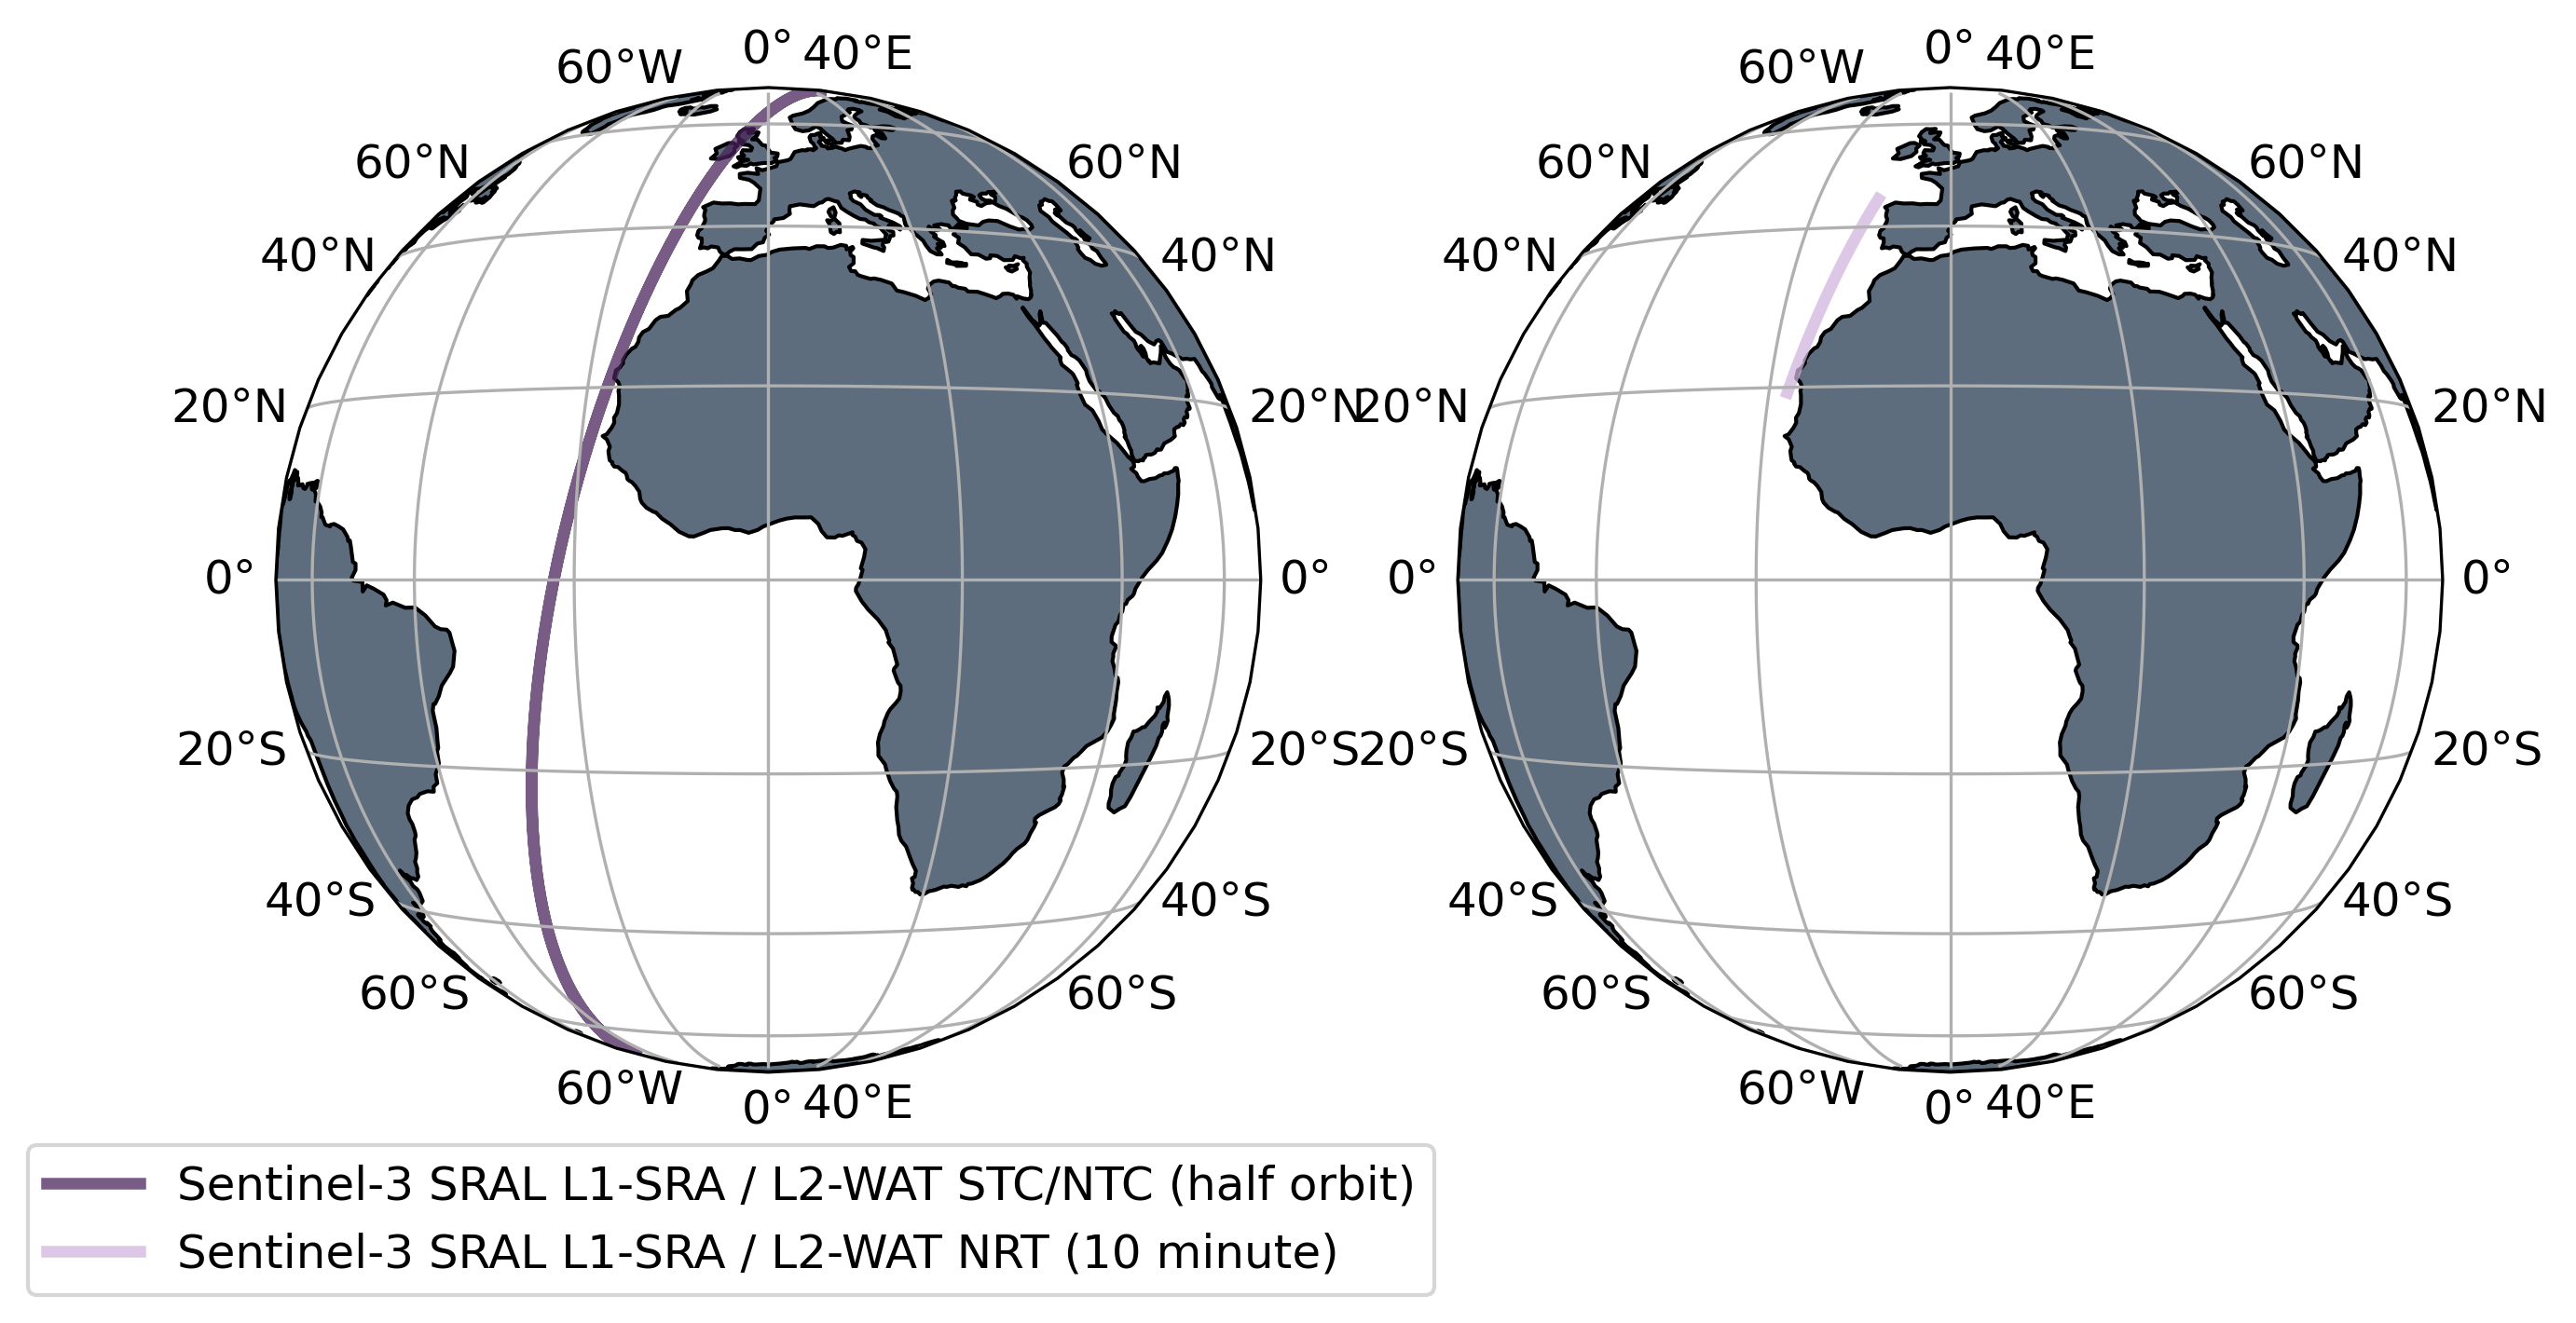

In [7]:
fig1 = plt.figure(figsize=(10, 10), dpi=300)

colours = ['#4A235A', '#D2B4DE']
labels = ['Sentinel-3 SRAL L1-SRA / L2-WAT STC/NTC (half orbit)', 'Sentinel-3 SRAL L1-SRA / L2-WAT NRT (10 minute)']
plots = []

for loc, colour, label, polygon, cut, acq_time in zip([1, 2], colours, labels, polygons, [False, True], acq_times):
    m = plt.subplot(1, 2, loc, projection=cartopy.crs.NearsidePerspective(central_longitude=0.0, 
                                                                          central_latitude=0.0))
    m.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='k', facecolor='#5D6D7E')
    m.set_global()

    gl = m.gridlines(draw_labels = True)
    coords = np.asarray(polygon.split(' ')).astype('float')
    if cut:
        tcut = int(len(coords)*600/acq_time)
        p, = m.plot(coords[51:tcut:2], coords[50:tcut:2], alpha=0.74, color=colour, 
                    linewidth=3, transform=cartopy.crs.Geodetic(), zorder=2)
    else:
        p, = m.plot(coords[1::2], coords[0::2], alpha=0.74, color=colour, linewidth=3, 
                    transform=cartopy.crs.Geodetic(), zorder=2)
    plots.append(p)

plt.legend(plots, labels, loc='lower right', bbox_to_anchor=(0.0, -0.25))
plt.savefig('1_3_SRAL_coverage.png', bbox_inches='tight')

<hr>
<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_2_SRAL_file_structure.ipynb"><< SRAL file structure</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_4_SRAL_tracks.ipynb">SRAL tracks >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean" target="_blank">View on GitLab</a> | <a href="https://training.eumetsat.int/" target="_blank">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int target="_blank">Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int target="_blank">Contact our training team to collaborate on and reuse this material</a></span></p>